## Kaggle Competition Practice

타이타닉 생존자 예측 문제 : 생존자와 사망자로 분류하는 모델을 학습한 뒤, answer(test) 데이터의 생존과 사망을 예측하기

titanic_dataset.csv는 학습에 필요한 training dataset이고, 
answer.csv는 오로지 평가만을 위한 test 데이터셋이다. 

최종평가는 answer.csv 로 한다. 

- %matplotlib inline : 주피터 노트북에서 그래프 그릴 것을 선언해줌.
- \# -*- coding: utf-8 -*- : 인코딩 타입은 utf-8 이라는 것을 선언.
- 데이터 frame 형태로 데이터를 관찰하고, 원하는 형태로 조작하기 위해 pandas와 numpy 라이브러리가 필요함.
- 원하는 형태로 데이터를 조작하였으면, 이를 시각화 하기 위해 matplotlib 라이브러리도 필요.

- Titanic : 훈련 set
- Answer : 결과 set - 추후 평가할때 사용된다. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("09_Titanic_dataset/titanic_dataset.csv") # 훈련 set
answer = pd.read_csv("09_Titanic_dataset/titanic_answer.csv") # 결과 set (for evaluation)

In [2]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
5,3,0,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q,NaN,NaN
6,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,NaN,NaN
7,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,NaN,"Plymouth, Devon / Detroit, MI"
8,1,0,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,NaN,"Haverford, PA"
9,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,NaN,"St Louis, MO"


In [3]:
print(titanic.shape) # 데이터셋의 크기 살펴보기
print(titanic.columns) # 데이터셋의 피처 살펴보기

(916, 13)
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')


결측값 데이터 관찰하기
- 훈련셋과 평가셋 데이터에서, 어떤 피처들에 결측값이 존재하는지 관찰해야 함.
- 훈련셋에서만 결측값을 확인한다면, 후에 모델링 할 때 feature가 맞지 않아 error 발생 확률이 높음.

In [4]:
print(titanic.isnull().sum())
print("------------------")
print(answer.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age          175
sibsp          0
parch          0
ticket         0
fare           0
cabin        702
embarked       2
body         831
home.dest    389
dtype: int64
------------------
pclass         0
survived       0
name           0
sex            0
age           88
sibsp          0
parch          0
ticket         0
fare           0
cabin        312
embarked       0
body         357
home.dest    175
dtype: int64


age, cabin, body, home.dest 에서 결측값이 존재한다

### 피처 엔지니어링 없이, 간단한 전처리로 1차 학습
- 나이 : 결측값을 평균값으로 보정
- 성별 : binary categorical 변수를 0,1로 치환
- Embarked : 결측값은 최빈값으로 보정하고, 범주형 변수이므로 one-hot encoding 적용.

In [5]:
# Age의 NaN값을 Age들의 평균으로 보정
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

In [6]:
# sex : male은 0, female은 1로 변환
titanic.loc[titanic['sex']=='male', 'sex'] = 0
titanic.loc[titanic['sex']=='female', 'sex'] = 1


In [7]:
# embark : 2개의 결측값은 최빈값으로 대체하고, one hot encoding 적용
embarked_mode = titanic['embarked'].value_counts().index[0] # 가장 많이 나온 값 (value_counts().index[0])
titanic['embarked'] = titanic['embarked'].fillna(embarked_mode) #embarked 의 NaN 을 가장 많이 나온 값으로 대체 (mode)


One-hot-encoding
value_counts() 할때, S, C, Q 세가지로 나온다. 

In [8]:
titanic['embarked'].value_counts()

S    654
C    179
Q     83
Name: embarked, dtype: int64

In [9]:
df_one_hot_encoded = pd.get_dummies(titanic.embarked)
titanic = pd.concat([titanic, df_one_hot_encoded], axis=1)

In [10]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest,C,Q,S
0,2,1,"Mellinger, Miss. Madeleine Violet",1,13.000000,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT",0,0,1
1,2,1,"Wells, Miss. Joan",1,4.000000,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH",0,0,1
2,2,1,"Duran y More, Miss. Florentina",1,30.000000,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba",1,0,0
3,3,0,"Scanlan, Mr. James",0,30.231444,0,0,36209,7.7250,NaN,Q,NaN,NaN,0,1,0
4,3,1,"Bradley, Miss. Bridget Delia",1,22.000000,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls...",0,1,0


어떤 변수가 생존에 유의미한 결과를 미치는지 시각적으로 탐색 하기 위해 반복하여 변수를 탐색해주는 
valid_features 함수를 생성한다. 


In [11]:
# 반복 작업으로 평가해주는 변수 탐색작업을 자동화
# 연속형 변수를 파라미터로 입력
import seaborn as sns
from scipy import stats
#Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지

#valid_features 라는 함수를 생성 
#T-Test Result 를 프린트해주는 함수

def valid_features(col_name):
    g = sns.FacetGrid(titanic, col='survived')
    g.map(plt.hist, col_name, bins=20) #histogram 형식으로 표시, #bins 는 bar 의 너비

    titanic_survived = titanic[titanic['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    #print("Survived = 1 일떄")
    #print("data length is", '%.2f' % len(titanic_survived_static))
    #print("data mean is", '%.2f' % np.mean(titanic_survived_static))
    #print("data variance is", '%.2f' % np.var(titanic_survived_static))
    #print("data std is", '%.2f' % np.std(titanic_survived_static))
    #print("data max is", '%.2f' % np.max(titanic_survived_static))
    #print("data min is", '%.2f' % np.min(titanic_survived_static))
    #print("data median is", '%.2f' % np.median(titanic_survived_static))
    #print("-----------------------")

    titanic_n_survived = titanic[titanic['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    #print("Survived = 0 일떄")
    #print("data length is", '%.2f' % len(titanic_n_survived_static))
    #print("data mean is", '%.2f' % np.mean(titanic_n_survived_static))
    #print("data variance is", '%.2f' % np.var(titanic_n_survived_static))
    #print("data std is", '%.2f' % np.std(titanic_n_survived_static))
    #print("data max is", '%.2f' % np.max(titanic_n_survived_static))
    #print("data min is", '%.2f' % np.min(titanic_n_survived_static))
    #print("data median is", '%.2f' % np.median(titanic_n_survived_static))
    #print("-----------------------")

    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)

    print("[Assuming Equal Variable]      T-Stastic : %.3f   P-Value : %.3f." % tTestResult)
    print("[Not Assuming Equal Variable]  T-Stastic : %.3f   P-Value : %.3f." % tTestResultDiffVar)



- Age / PClass (1등석 2등석 3등석) / Sibsp (함께 탄 사람) / Parch / Fare (배에서 쓴 금액) 에 valid_features 함수를 적용한다. 

- T-Test : 두개의 독립적인 정규분포에서 나온 두개의 데이터셋을 사용하여 두 정규분포의 기댓값이 동일한지를 검사한다. 

- seaborn FacetGrid : 표를 그려준다.


[Assuming Equal Variable]      T-Stastic : -0.553   P-Value : 0.581.
[Not Assuming Equal Variable]  T-Stastic : -0.541   P-Value : 0.589.


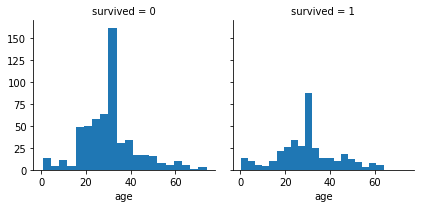

In [12]:
valid_features('age')

[Assuming Equal Variable]      T-Stastic : -9.848   P-Value : 0.000.
[Not Assuming Equal Variable]  T-Stastic : -9.507   P-Value : 0.000.


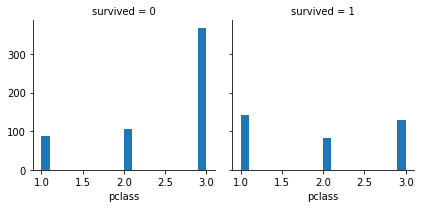

In [13]:
valid_features('pclass')

[Assuming Equal Variable]      T-Stastic : -2.118   P-Value : 0.034.
[Not Assuming Equal Variable]  T-Stastic : -2.446   P-Value : 0.015.


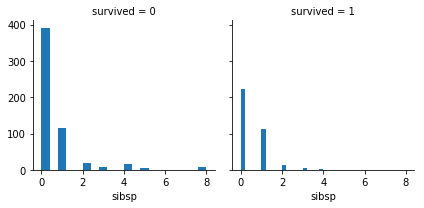

In [14]:
valid_features('sibsp')

[Assuming Equal Variable]      T-Stastic : 1.865   P-Value : 0.063.
[Not Assuming Equal Variable]  T-Stastic : 1.942   P-Value : 0.052.


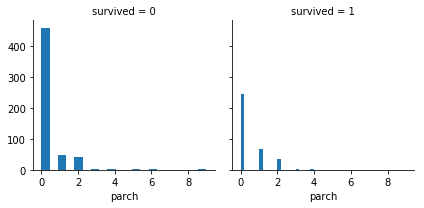

In [15]:
valid_features('parch')

[Assuming Equal Variable]      T-Stastic : 7.523   P-Value : 0.000.
[Not Assuming Equal Variable]  T-Stastic : 6.657   P-Value : 0.000.


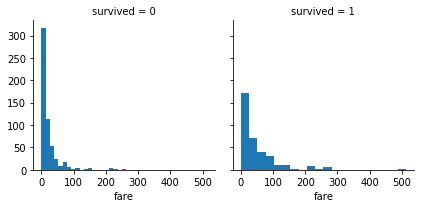

In [16]:
valid_features('fare')

- P-Value 를 알아본 결과, fare , subsp, pclass 는 유의미한 차이가 있음을 알 수 있다

C:\Anaconda\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Anaconda\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


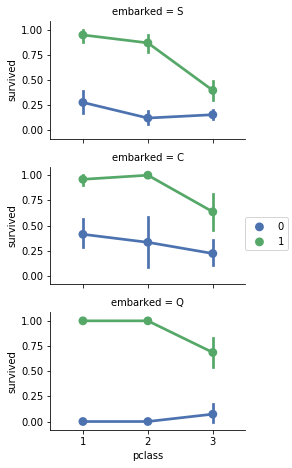

In [21]:
grid = sns.FacetGrid(titanic, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()


In [22]:
titanic = titanic.drop(['embarked'], axis=1) # one-hot encoding을 완료했기 때문에 원 피처는 제거

- Training dataset을 Training dataset, validation dataset으로 분리
- 추가적인 핸들링이 별도로 필요해보이는 피처나, 결과에 무의미한 영향을 미치는 것 처럼 보이는 변수들을 제거
- 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' 만 1차 학습에서 선택

In [23]:
# name, cabin 변수는 전처리 및 핸들링이 필요해 보이므로 일단 제외.
# ticket, body, home.dest는 무의미한 피처로 보이므로 제외.
titanic = titanic.drop(['name', 'cabin', 'ticket', 'body', 'home.dest'], axis=1)

# train, validation set 분리.
# model_selection train_test_split: ramdom 하게 테스트값과 valid 값으로 구분한다. 
from sklearn.model_selection import train_test_split
train, valid = train_test_split(titanic, test_size=0.2, random_state=0) # test 값을 titanic 의 20퍼센트로 saving 해둔다 (valid)

train_y = train['survived']
train_x = train.drop(['survived'], axis=1)

valid_y = valid['survived']
valid_x = valid.drop(['survived'], axis=1)

In [24]:
train_x.head()

,pclass,sex,age,sibsp,parch,fare,C,Q,S
511,1,0,29.000000,1,0,66.6000,0,0,1
527,1,0,30.231444,0,0,227.5250,1,0,0
85,1,1,30.000000,0,0,93.5000,0,0,1
413,2,0,27.000000,1,0,26.0000,0,0,1
75,3,0,40.000000,0,0,7.8958,0,0,1


In [25]:
print(train_x.shape)

(732, 9)


In [26]:
print(valid_x.shape)

(184, 9)


In [27]:
print(titanic.shape)

(916, 10)


### 로지스틱 회귀
로지스틱 회귀로 학습한 뒤, 제대로 분류되지 않은 case를 단순 count로 검출 

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(train_x, train_y)
pred_y = lr.predict(valid_x)

print("Misclassification samples : %d" %(valid_y != pred_y).sum())

Misclassification samples : 43


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(valid_y, pred_y))
print("Precision : %.3f" % precision_score(valid_y, pred_y))
print("Recall : %.3f" % recall_score(valid_y, pred_y))
print("F1 : %.3f" % f1_score(valid_y, pred_y))

accuracy: 0.77
Precision : 0.691
Recall : 0.681
F1 : 0.686
